# TEST BLANC TP

## Impotation des dependances 

In [44]:
# Start by pandas and Numpy
import pandas as pd
import numpy as np

#seaborn and matplotlib for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Classification continous

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Classification Categorial 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# Kmeans
from sklearn.cluster import KMeans

# Preprocessing 
from sklearn.model_selection import train_test_split
#metrics
from sklearn import metrics

## Importation des donnes

In [45]:
df = pd.read_csv('./data/Cleaned_Students_Performance.csv')
#df.head(3)
#df.plot()
#df.shape
#df.describe()
#df.isnull()
df.info()
#df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.3+ KB


## Cleaning

In [46]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['race_num'] = label_encoder.fit_transform(df['race_ethnicity'])
df['parental_num'] = label_encoder.fit_transform(df['parental_level_of_education'])

df = df.drop(columns=['race_ethnicity','lunch', 'parental_level_of_education', 'test_preparation_course','math_score','reading_score', 'writing_score',	'total_score'])
df.head()


,gender,average_score,race_num,parental_num
0,0,72.666667,1,1
1,0,82.333333,2,4
2,0,92.666667,1,3
3,1,49.333333,0,0
4,1,76.333333,2,4


In [ ]:
fig = df.plot(kind='scatter', x ='parental_num', y='average_score')
fig.set_xlabel("parental_num")
fig.set_ylabel("average_score")
fig.set_title("average_score vs parental_num")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [ ]:
fig = df.plot(kind='scatter', x ='gender', y='average_score')
fig.set_xlabel("gender")
fig.set_ylabel("average_score")
fig.set_title("average_score vs gender")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [ ]:
fig = df.plot(kind='scatter', x ='race_num', y='average_score')
fig.set_xlabel("race_num")
fig.set_ylabel("average_score")
fig.set_title("average_score vs race_num	")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [ ]:
# Histogram :
fig = df.hist()
fig=plt.gcf()
fig.suptitle("Histogramme ", fontsize=16)
fig.set_size_inches(10,6)
plt.show()

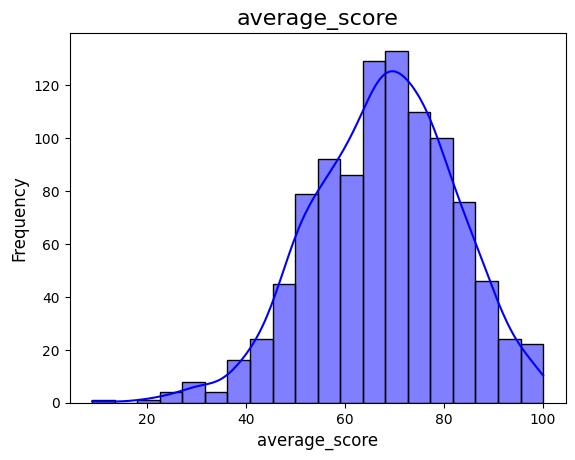

<Figure size 800x600 with 0 Axes>

In [57]:
# Distribution of Spending Score (Target variable)

sns.histplot(df['average_score'], bins=20, kde=True, color='blue')
plt.title('average_score', fontsize=16)
plt.xlabel('average_score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.figure(figsize=(8,6))
plt.show()

C:\Users\zakaria boukeffa\AppData\Local\Temp\ipykernel_13972\3710369680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='average_score', data=df, palette="Set2")


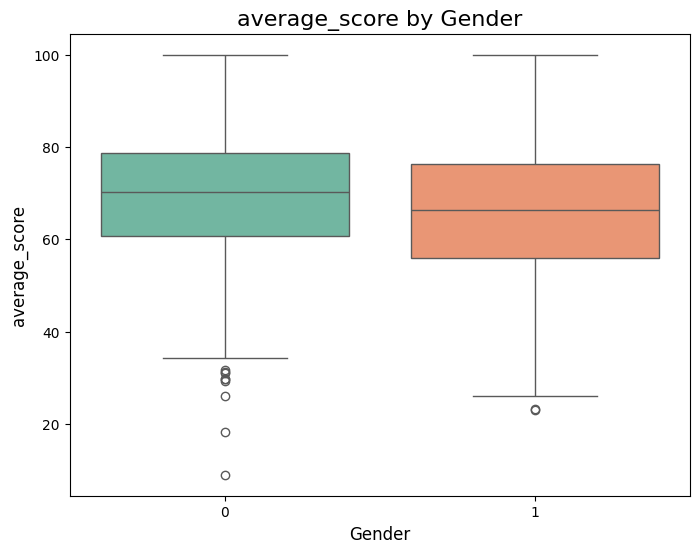

In [58]:
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='average_score', data=df, palette="Set2")
plt.title('average_score by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('average_score', fontsize=12)
plt.show()